In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [53]:
#Load the data set
#top 30 cyptocurrencies on yahoo api. columns represent stock prices on ADJ close. Load the CCI30 Index on Close
stock_prices = pd.read_csv('./Data/Yahoo_Stock_Prices_Cleaned.csv')
CCI30 = pd.read_csv('./Data/cci30_OHLCV.csv')

In [54]:
stock_prices.set_index('Date', inplace = True)
stock_prices

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DOGE-USD,EOS-USD,ETC-USD,ETH-USD,FIL-USD,LINK-USD,LTC-USD,THETA-USD,TRX-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,
2018-10-08,0.086607,528.974976,10.506600,6652.229980,0.005578,5.913450,10.954900,229.255005,3.687200,0.343585,59.412601,0.098601,0.026592,1.002210,0.995814,0.013666,0.249009,114.275002,0.489751
2018-10-09,0.086357,517.789978,10.384900,6642.640137,0.005635,5.909760,10.893400,227.981995,3.538730,0.339712,58.713299,0.100051,0.026058,1.006860,0.996779,0.013595,0.243915,113.674004,0.479857
2018-10-10,0.084679,512.924011,10.328000,6585.529785,0.005552,5.879900,10.827500,225.768997,3.690460,0.347861,57.981800,0.099233,0.025355,1.009620,0.993502,0.013281,0.241593,113.459000,0.462387
2018-10-11,0.070939,433.036987,9.301320,6256.240234,0.005000,5.077270,9.172000,189.498993,4.044170,0.303201,51.233002,0.080807,0.020929,1.009780,0.993026,0.011229,0.207037,100.384003,0.383130
2018-10-12,0.073214,443.229004,9.528940,6274.580078,0.005247,5.179550,9.463560,196.727005,4.042340,0.311278,53.551701,0.085968,0.022738,1.012720,0.994102,0.011562,0.216032,100.709000,0.419115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,1.511987,689.947876,329.879913,35697.605469,0.311205,6.120921,68.357330,2419.906250,66.820404,27.951693,177.320663,6.564076,0.072087,1.000196,1.000481,0.108300,0.398792,262.820526,0.900148
2021-05-29,1.406232,651.579956,305.052155,34616.066406,0.303110,6.018345,64.280930,2279.514160,68.212379,25.398640,163.808105,6.313582,0.068783,0.999901,1.000392,0.098990,0.367157,242.684479,0.831788
2021-05-30,1.577279,663.512024,325.784027,35678.128906,0.302224,6.042301,66.365997,2390.305420,68.422081,26.869602,170.978226,6.545633,0.072036,0.999498,1.000063,0.107572,0.375688,262.333740,0.906609


In [58]:
#Resample stock_prices to weekly data
stock_prices.index = pd.to_datetime(stock_prices.index)

stock_prices= stock_prices.resample('W', label = 'left').apply('mean')

stock_prices

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DOGE-USD,EOS-USD,ETC-USD,ETH-USD,FIL-USD,LINK-USD,LTC-USD,THETA-USD,TRX-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,
2018-10-07,0.078027,474.799853,9.869552,6426.877232,0.005336,5.483019,10.028827,209.255428,3.764409,0.327109,55.218801,0.091596,0.024123,1.009276,0.992977,0.012311,0.226077,106.506429,0.436629
2018-10-14,0.075885,448.679003,9.887533,6521.534319,0.004680,5.400537,9.688363,206.365426,3.738059,0.365271,53.492214,0.088922,0.024339,1.014517,0.980352,0.011582,0.237085,105.054428,0.459073
2018-10-21,0.074066,441.413147,9.713064,6482.364328,0.004058,5.392753,9.716568,203.979429,3.771560,0.427867,52.209029,0.089357,0.023475,1.009831,0.990100,0.011210,0.236232,105.866713,0.458357
2018-10-28,0.071448,455.234427,9.490667,6355.445592,0.003774,5.267821,9.103630,199.908997,3.705430,0.490919,50.562929,0.090837,0.022568,1.000481,0.993573,0.010419,0.229351,105.171284,0.452489
2018-11-04,0.076866,573.274440,9.642703,6438.662946,0.003418,5.514107,9.504687,212.986287,3.925359,0.495551,53.102342,0.090452,0.023417,1.005060,0.993721,0.010540,0.259323,108.956143,0.512712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-02,1.543623,1301.046788,643.531459,56963.835938,0.587538,9.245114,101.987632,3573.514369,150.273111,47.774492,341.365574,11.340342,0.140400,1.000091,1.000066,0.215696,0.597920,435.424975,1.549016
2021-05-09,1.911879,1280.438198,598.900774,50646.839844,0.486202,10.869380,97.111301,3846.668248,123.137442,44.018481,325.620819,9.848562,0.124447,1.000045,0.999961,0.185405,0.668717,410.823268,1.402124
2021-05-16,1.667173,794.926078,377.338719,39120.571429,0.386735,6.558218,69.620088,2677.621129,81.154884,29.443007,210.213702,7.424356,0.087807,1.000224,1.001295,0.122098,0.488264,268.557598,1.150456


In [59]:
#Set Index as Date and filter data to just include Closing price
CCI30.set_index('Date', inplace = True)
CCI30 = pd.DataFrame(CCI30['Close'])

KeyError: "None of ['Date'] are in the columns"

In [61]:
stock_prices.mean()

ADA-USD          0.232667
BCH-USD        334.762864
BNB-USD         63.448567
BTC-USD      15061.602196
DOGE-USD         0.028041
EOS-USD          3.780893
ETC-USD          9.941170
ETH-USD        527.474308
FIL-USD         20.149965
LINK-USD         8.202304
LTC-USD         84.188001
THETA-USD        1.281123
TRX-USD          0.029780
USDC-USD         1.003938
USDT-USD         1.002161
VET-USD          0.021985
XLM-USD          0.149577
XMR-USD        104.246770
XRP-USD          0.373442
dtype: float64

In [62]:
stock_prices.groupby(pd.to_datetime(stock_prices.index).year).mean()

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DOGE-USD,EOS-USD,ETC-USD,ETH-USD,FIL-USD,LINK-USD,LTC-USD,THETA-USD,TRX-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,
2018,0.054855,302.997290,7.333880,5008.492308,0.003094,3.882158,6.839352,157.062955,3.413724,0.362140,40.228607,0.068670,0.019312,1.012606,0.998406,0.007322,0.182365,76.155712,0.409098
2019,0.055380,262.327353,20.235226,7451.137858,0.002561,4.022526,5.552027,181.584784,4.296118,1.559280,69.877896,0.104005,0.022432,1.005136,1.004587,0.005489,0.086741,66.512926,0.307210
2020,0.088314,271.837161,21.601948,11335.822076,0.002800,2.915002,6.509215,314.135255,16.445712,7.543888,57.120813,0.382417,0.020879,1.002114,1.001294,0.010339,0.083305,85.806992,0.258984
2021,1.097975,673.478117,297.658059,47796.835849,0.162670,5.196576,30.260294,2068.166743,76.267801,30.093074,207.964882,6.904069,0.074369,1.000295,1.000699,0.097165,0.435367,253.620048,0.779457


In [63]:
CCI30.groupby(pd.to_datetime(CCI30.index).year).mean()

,Close
Date,
2015,81.790556
2016,212.644912
2017,3091.841871
2018,6727.370247
2019,3130.473096
2020,4165.270000
2021,19172.878733


In [64]:
stock_prices.isnull().sum()



ADA-USD      0
BCH-USD      0
BNB-USD      0
BTC-USD      0
DOGE-USD     0
EOS-USD      0
ETC-USD      0
ETH-USD      0
FIL-USD      0
LINK-USD     0
LTC-USD      0
THETA-USD    0
TRX-USD      0
USDC-USD     0
USDT-USD     0
VET-USD      0
XLM-USD      0
XMR-USD      0
XRP-USD      0
dtype: int64

In [20]:
stock_prices.mean().sort_values(ascending = False)

BTC-USD      11610.728730
ETH-USD        420.664025
BCH-USD        320.833787
XMR-USD         93.177140
LTC-USD         74.886345
BNB-USD         57.323908
FIL-USD         17.991599
ETC-USD         10.258462
LINK-USD         6.058855
EOS-USD          3.886726
THETA-USD        1.013630
USDC-USD         1.004634
USDT-USD         1.002452
XRP-USD          0.366273
ADA-USD          0.184102
XLM-USD          0.128420
DOGE-USD         0.028803
TRX-USD          0.028557
VET-USD          0.020033
dtype: float64

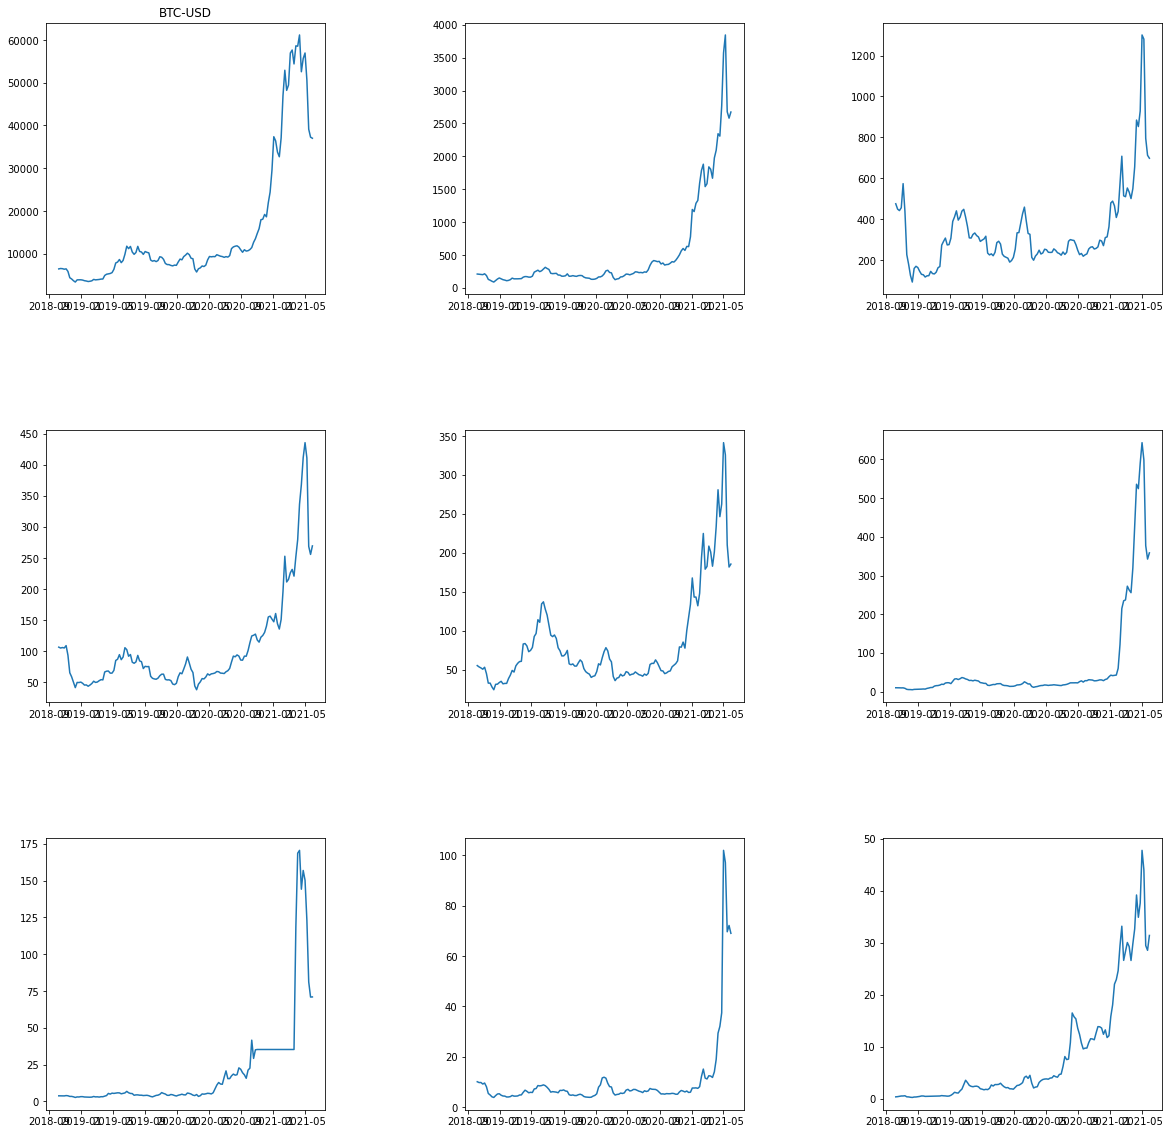

In [65]:
#Plot Stock Prices Data
plt.rcParams["figure.figsize"] = (10,10)
#stock_prices.pivot_table(index=stock_prices.index,values=stock_prices.columns).plot()

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5,wspace = 0.5);

axs[0, 0].plot(stock_prices.index,stock_prices['BTC-USD'])
axs[0, 0].set_title('BTC-USD')
axs[0, 1].plot(stock_prices.index,stock_prices['ETH-USD'])
axs[0, 2].plot(stock_prices.index,stock_prices['BCH-USD'])
axs[1, 0].plot(stock_prices.index,stock_prices['XMR-USD'])
axs[1, 1].plot(stock_prices.index,stock_prices['LTC-USD'])
axs[1, 2].plot(stock_prices.index,stock_prices['BNB-USD'])
axs[2, 0].plot(stock_prices.index,stock_prices['FIL-USD'])
axs[2, 1].plot(stock_prices.index,stock_prices['ETC-USD'])
axs[2, 2].plot(stock_prices.index,stock_prices['LINK-USD'])


plt.show()

Unsurprisingly,the purple line that is bitcoin dominates closing price over the years


In [11]:
CCI30.sort_index(inplace=True)

C:\Users\kenne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

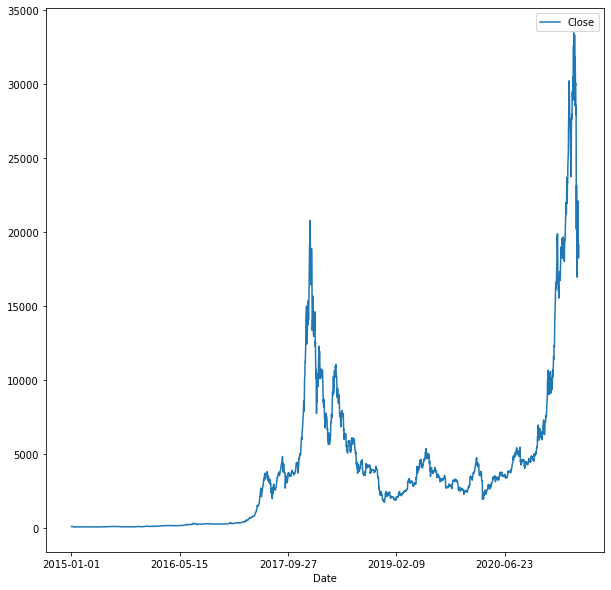

In [12]:
#plot CCI30 data
plt.rcParams["figure.figsize"] = (10,10)
CCI30.plot( y='Close')

This graph looks identical to the Bitcoin line in the stock prices data

We can already see that Bitcoin has a strong relationship to the CCI30 index. Lets now explore how many other stocks help to explain the entire CCi30 index

## PCA Analysis 


In [13]:
stock_scaled = scale(stock_prices)
stock_price_PCA = PCA().fit(stock_scaled)

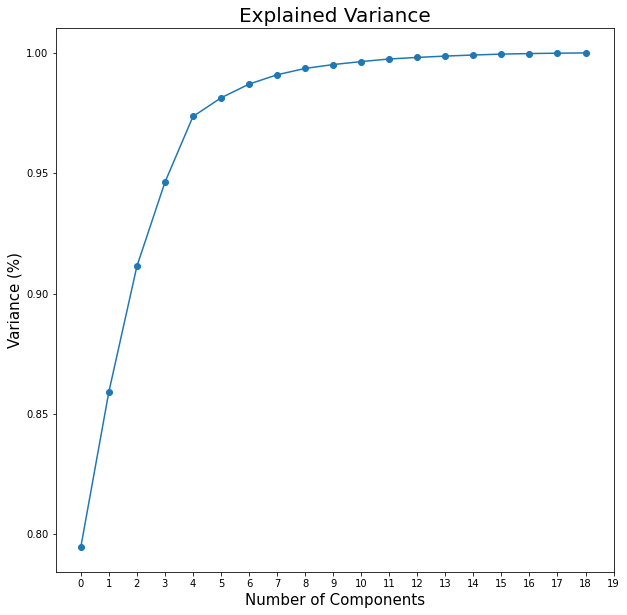

In [14]:
# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(stock_price_PCA.explained_variance_ratio_),marker='o')

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

plt.xticks(np.arange(0,len(stock_prices.columns)+1,1))

# show the plot
plt.show()

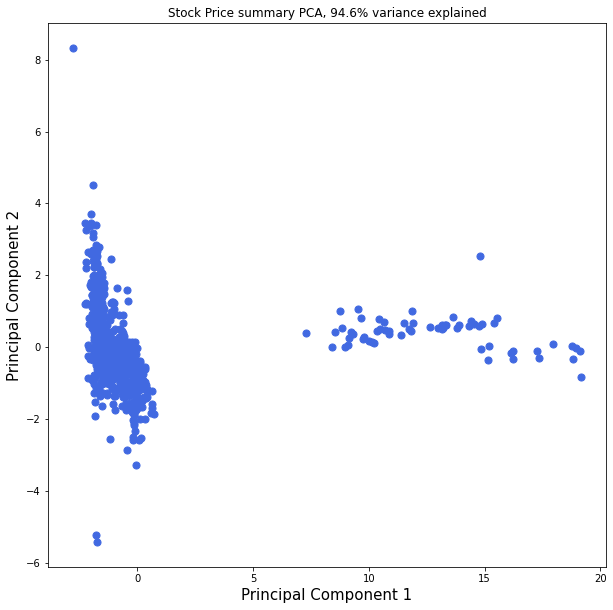

In [74]:
# create a PCA modified dataset
pca_dataset = PCA(n_components=4).fit(stock_scaled).transform(stock_scaled)

# store it in a new data frame
pca_dataset= pd.DataFrame(data = pca_dataset, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
pc_var = 100 * stock_price_PCA.explained_variance_ratio_.cumsum()[3]
# define a figure
plt.figure()

# define the label and title
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title(f'Stock Price summary PCA, {pc_var:.1f}% variance explained')

# plot the figure
plt.scatter(pca_dataset['principal component 1'], pca_dataset['principal component 2'], c='royalBlue', s = 50)

In [75]:
pca_dataset

,principal component 1,principal component 2,principal component 3,principal component 4
0,0.199365,-1.487350,1.270371,-0.458724
1,0.116836,-1.034018,1.657588,-0.293691
2,0.069943,-1.179238,2.024334,0.097944
3,-0.423952,-1.064639,1.685004,0.409056
4,-0.339238,-0.743545,1.992810,0.443062
...,...,...,...,...
787,9.117588,0.054253,-0.016058,-0.856428
788,8.396734,-0.004146,-0.103652,-0.798709
789,8.969588,-0.003007,-0.150592,-0.763605
790,10.140095,0.159115,-0.002220,-0.868520


In [81]:
#Loading Analysis for our PCA 
from sklearn import decomposition
from sklearn.preprocessing import scale
pca_loading = PCA(n_components=4).fit(stock_scaled)


In [82]:
pca_loading.components_.T

array([[ 0.24881882,  0.05950472, -0.04248736, -0.00131836],
       [ 0.23746208, -0.18362989,  0.1904717 , -0.18169753],
       [ 0.25371281,  0.06750859, -0.06616912,  0.06338943],
       [ 0.24685214,  0.02067767, -0.16807149,  0.17283351],
       [ 0.23575567,  0.05050218,  0.03987661, -0.19748124],
       [ 0.18503057, -0.22644332,  0.4401088 , -0.42405375],
       [ 0.22435304, -0.00815708,  0.13116497, -0.31390118],
       [ 0.25310193,  0.04070615, -0.04647685, -0.03051374],
       [ 0.24022325,  0.08197503, -0.18403073,  0.28746703],
       [ 0.24286509,  0.03787183, -0.20257304,  0.12051514],
       [ 0.24543554, -0.05084396,  0.05326344, -0.18816293],
       [ 0.24748273,  0.09648928, -0.1204939 ,  0.20933616],
       [ 0.25010558,  0.07604288, -0.01179653,  0.06943099],
       [-0.05245515,  0.54309344,  0.70743602,  0.36623715],
       [-0.03533885,  0.75690421, -0.27043734, -0.52578407],
       [ 0.25082711,  0.06779183, -0.06491594,  0.09507097],
       [ 0.24404556,  0.

In [86]:
loadings = pd.DataFrame(pca_loading.components_.T, columns=['PC1', 'PC2','PC3','PC4'], index=stock_prices.columns)
loadings

,PC1,PC2,PC3,PC4
ADA-USD,0.248819,0.059505,-0.042487,-0.001318
BCH-USD,0.237462,-0.183630,0.190472,-0.181698
BNB-USD,0.253713,0.067509,-0.066169,0.063389
BTC-USD,0.246852,0.020678,-0.168071,0.172834
DOGE-USD,0.235756,0.050502,0.039877,-0.197481
EOS-USD,0.185031,-0.226443,0.440109,-0.424054
ETC-USD,0.224353,-0.008157,0.131165,-0.313901
ETH-USD,0.253102,0.040706,-0.046477,-0.030514
FIL-USD,0.240223,0.081975,-0.184031,0.287467
LINK-USD,0.242865,0.037872,-0.202573,0.120515


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [19] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


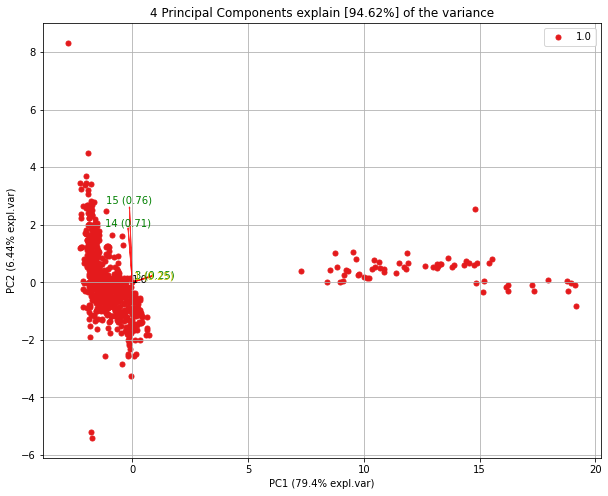

In [79]:
#Biplot of PCA 

from pca import pca


pca = pca(n_components = 4)

results = pca.fit_transform(stock_scaled)

fig,ax=pca.biplot(n_feat = 4)

In [52]:
#save stock_prices to csv file for preprocessing

pca_dataset.to_csv("./Data/PCA_Dataset.csv")

NameError: name 'pca_dataset' is not defined